# Matemática para Ciencia de los Datos
# Trabajo Práctico 3

Profesor: Luis Alexánder Calvo Valverde 

Instituto Tecnológico de Costa Rica, 

Programa Ciencia de Datos

---

Fecha de entrega: Lunes 15 de Mayo del 2023, a más tardar a las 3:00 pm.

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo jupyter ( .IPYNB ). 

Estudiante(s):
1. Ricardo Chacón
1. Gabriel Valentine

---

**Pregunta 1**



Se puede demostrar que para los vectores generadores de un subespacio $E=\textrm{espacioGenerado}\left\{ \vec{v}_{1},\vec{v}_{2},\ldots,\vec{v}_{m}\right\}$ , con $V=\left[\vec{v}_{1},\vec{v}_{2},\ldots,\vec{v}_{m}\right]$,con $\vec{v}_{m}\in\mathbb{R}^{n}$ si son ortonormales, la ecuación de la proyección de un vector $\vec{u}\in\mathbb{R}^{n}$ originalmente dada por:

$$\textrm{proy}\left(\vec{u};V\right)=\textrm{argmin}_{\vec{v}\in E}\left\Vert \vec{v}-\vec{u}\right\Vert _{2}=V\,\left(V^{T}V\right)^{-1}V^{T}\vec{u}$$

se puede reescribir como: 

$$\textrm{proy}\left(\vec{u};V\right)=\textrm{argmin}_{\vec{v}\in E}\left\Vert \vec{v}-\vec{u}\right\Vert _{2}=V\,V^{T}\vec{u}$$

con $V\in\mathbb{R}^{n\times m}$.









**1.1 (25 puntos)**

Utilizando numpy, proponga una matriz ortonormal de dimensiones 3x3, para ello utilice una fuente como "Proceso de ortonormalización de  Gram - Schmidt" (https://blog.nekomath.com/algebra-lineal-i-proceso-de-gram-schmidt/) para producir una matriz ortonormal a partir de una matriz que no es ni ortonormal ni ortogonal. 

Finalmente muestre en numpy que su matriz resultante es ortonormal ($V$).



In [72]:

import numpy as np
np.set_printoptions(floatmode='fixed')


#Defino al funcion GramSchimdt

def GramSchmidt(U):
  tam = U.shape


  m = tam[0]
  n = tam[1]
  V = np.zeros((m,n))
  V[0] = U[0]
  
  for i in range(1,m):
    V[i]=U[i]
    for j in range(i):
      V[i]=V[i]-(np.dot(U[i],V[j]))/(np.dot(V[j],V[j]))*V[j]

    return V

#Propongo matriz no ortogonal ni ortonormal
U = np.array(([1,1,0],[2,0,-1],[1,1,2]))


print (U)

#Aplicar la funcion GramSchimdt
V = GramSchmidt(U)
print (V)

#Verificar si V es ortonormal
es_ortonormal = np.allclose(np.dot(V, V.T), np.eye(V.shape[0])) and np.allclose(np.linalg.det(V), 1)


if es_ortonormal:

  print('Es ortonormal')

else:

    print('No es ortonormal')



[[ 1  1  0]
 [ 2  0 -1]
 [ 1  1  2]]
[[ 1.0000  1.0000  0.0000]
 [ 1.0000 -1.0000 -1.0000]
 [ 0.0000  0.0000  0.0000]]
No es ortonormal


**1.2 (15 puntos)**

Proponga un vector $\vec{u}$ y programe en numpy las operaciones algebraicas siguientes (tome $V$ del paso anterior).

$V\,\left(V^{T}V\right)^{-1}V^{T}\vec{u}$

y,

$V\,V^{T}\vec{u}$


In [40]:
# Definir el vector u
u = np.array([1, 2, 3])

# Proyeccion 1
proy1 = np.dot(V, np.dot(np.linalg.inv(np.dot(V.T, V)), np.dot(V.T, u)))

# Proyeccion 2
proy2 = np.dot(np.dot(V, V.T), u)

# Imprimir los resultados
print("Proyeccion 1:")
print(proy1)
print("Proyeccion 2:")
print(proy2)

LinAlgError: ignored

**1.3 (10 puntos)**

Programe en python para calcular el error de proyección obtenido para los casos del punto **1.2**.

In [41]:
def calculateProjectionError(v, u):

  return LA.norm(v - y, 2)


error1 = calculateProjectionError(proy1, u)
error2 = calculateProjectionError(proy2, u)

print("Error de proyección 1: ")
print(error1)

print("Error de proyección 2: ")
print(error2)

NameError: ignored

---

**Pregunta 2 (10 puntos)**


Programe en python la función calculeDet2, que recibe como parámetro una matriz cuadrada de dimensiones 2x2, llamada M, y retorna el determinante de esa matriz. Usted debe programar las operaciones matemáticas necesarias, no utilizar una función tipo det para calcularla. Pruébela con dos matrices que Usted proponga.

def calculeDet2( M ):





In [44]:
def calculeDet2(M):
    det = M[0, 0] * M[1, 1] - M[0, 1] * M[1, 0]
    return det

# Ejemplo 1
A = np.array([[1, -9],
              [6, 3]])

det_A = calculeDet2(A)
print("Matriz 1:")
print(A)
print("Determinante de A:", det_A)

# Ejemplo 2
B = np.array([[5, -3],
              [8, 0]])

det_B = calculeDet2(B)
print("\nMatriz 2:")
print(B)
print("Determinante de B:", det_B)

Matriz 1:
[[ 1 -9]
 [ 6  3]]
Determinante de A: 57

Matriz 2:
[[ 5 -3]
 [ 8  0]]
Determinante de B: 24


---

**Pregunta 3 (10 puntos)**


Programe en python la función calculeDet3, que recibe como parámetro una matriz cuadrada de dimensiones 3x3, llamada M, y retorna el determinante de esa matriz. Usted debe programar las operaciones matemáticas necesarias, no utilizar una función de numpy tipo det para calcularla (sí puede usar función que programó en la **Pregunta 2**). Pruébela con dos matrices que Usted proponga.

def calculeDet3( M ):






In [47]:
def calculeDet3(M):
    det = (M[0, 0] * (M[1, 1] * M[2, 2] - M[1, 2] * M[2, 1])
        - M[0, 1] * (M[1, 0] * M[2, 2] - M[1, 2] * M[2, 0])
        + M[0, 2] * (M[1, 0] * M[2, 1] - M[1, 1] * M[2, 0]))
    return det

# Ejemplo 1
A = np.array([[2, -3, 4],
              [1, 0, -2],
              [3, 1, 5]])

det_A = calculeDet3(A)
print("Matriz 1:")
print(A)
print("Determinante de A:", det_A)

# Ejemplo 2
B = np.array([[1, 2, 3],
              [-1, 0, 1],
              [4, -2, 6]])

det_B = calculeDet3(B)
print("\nMatriz 2:")
print(B)
print("Determinante de B:", det_B)

Matriz 1:
[[ 2 -3  4]
 [ 1  0 -2]
 [ 3  1  5]]
Determinante de A: 41

Matriz 2:
[[ 1  2  3]
 [-1  0  1]
 [ 4 -2  6]]
Determinante de B: 28


---

**Pregunta 4 (15 puntos)**

Se tiene que:

$$\textrm{det}\left(A\,B\right)=\textrm{det}\left(A\right)\,\textrm{det}\left(B\right)$$

Proponga dos matrices de 4x4 ( $A$ e $B$) y programando en numpy muestre esta igualdad (puede usar de numpy las funciones det y la de multiplicar matrices).






In [52]:
A = np.array([[2, -3, 4, 5],
              [1, 0, -2, 2],
              [3, 1, 5, 2],
              [3, 5, 8, -1]])

B = np.array([[1, 2, 3, -1],
              [-1, 0, 1, 8],
              [4, -2, 6, 4],
              [-3, -6, 2, 0]])

det_A = np.linalg.det(A)
det_B = np.linalg.det(B)

det_AB = np.linalg.det(np.dot(A,B))

igualdad = np.isclose(det_AB, det_A * det_B)

print('Det(A) =',det_A)
print('Det(B) =',det_A)
print('Det(A)*Det(B) =',det_A*det_B)
print('Det(AB) =',det_AB)

if igualdad:
  print('La igualdad sí cumple')

else:
  print('La igualdad no cumple')

Det(A) = 82.00000000000001
Det(B) = 82.00000000000001
Det(A)*Det(B) = -84459.99999999996
Det(AB) = -84459.9999999999
La igualdad sí cumple


---

**Pregunta 5 (15 puntos)**


Utilizando el archivo "Dataset_usar.csv", haga:
- Cargue el archivo.
- Muestre cuántas filas por cuántas columnas tiene el conjunto de datos.
- Utilizando el modelo $Ax=b$
    - Conforme la matriz $A$ con todas las columnas menos la última de la derecha.
    - Conforme el vector $b$ con la última columna de la derecha.
    - Calcule el vector de pesos ($x$), utilizando el concepto de mínimos cuadrados $\left(A^{T}A\right)^{-1}A^{T}\vec{b}$
    - Calcule un b_estimado con $A$ e $x$
    - Calcule la norma 2 de la diferencia entre b y b_estimado.
    - Grafique b y b_estimado.



In [59]:
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
archivo = '/content/drive/MyDrive/Colab Notebooks/Módulo 1/Tareas/Tarea 3/Dataset_usar.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
dataFrame = pd.read_csv(archivo, header = 0, delimiter =';')
colNames = dataFrame.columns
print(dataFrame.head())

# Convertir de pandas a numpy
data = pd.DataFrame(dataFrame).to_numpy()

# ver dimensiones
total_columnas = data.shape[1]
total_filas = data.shape[0]
print("Total filas ", total_filas)
print("Total columnas ", total_columnas)


   bias    Length  Diameter    Height     Whole   Shucked  Sex_Female  \
0     1  0.186567  0.155963  0.195652  0.011688  0.333333           0   
1     1  0.813433  0.761468  0.826087  0.433327  0.333333           1   
2     1  0.410448  0.376147  0.369565  0.074022  0.333333           1   
3     1  0.537313  0.504587  0.500000  0.143085  0.333333           1   
4     1  0.507463  0.495413  0.565217  0.146981  0.333333           0   

   Sex_Masculine  Shellweight  
0              1        0.010  
1              0        0.435  
2              0        0.068  
3              0        0.096  
4              1        0.144  
Total filas  998
Total columnas  9


In [61]:

A = []
b = []

for row in data:
  A.append(row[0:7])
  b.append(row[8])

A = np.array(A)
A.shape

(998, 7)

In [64]:
#vector de pesos utilizando minimos cuadrados x

x = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(A), A)), np.transpose(A)), b)
x.shape

(7,)

In [68]:
#calculo b estimado
b_estimado = np.matmul(A,x)
b_estimado.shape

(998,)

In [65]:
#calculo norma 2
from numpy import linalg as LA
LA.norm(b - b_estimado)

1.2226067361507618

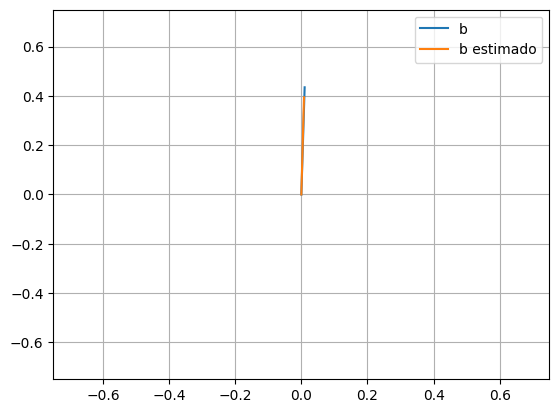

In [66]:
plt.plot([0, b[0]], [0, b[1]], label="b")
plt.plot([0, b_estimado[0]], [0, b_estimado[1]], label="b estimado")
plt.legend()
plt.xlim(-0.75,0.75)
plt.ylim(-0.75,0.75)
plt.grid()
plt.show()